#StreetEasy Dataset

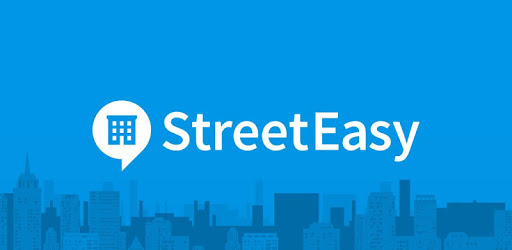


[StreetEasy](https://streeteasy.com/) is New York City’s leading real estate marketplace — from studios to high-rises, Brooklyn Heights to Harlem.

In this lesson, you will be working with a dataset that contains a sample of 5,000 rentals listings in Manhattan, Brooklyn, and Queens, active on StreetEasy in June 2016.

It has the following columns:

* rental_id: rental ID
* rent: price of rent in dollars
* bedrooms: number of bedrooms
* bathrooms: number of bathrooms
* size_sqft: size in square feet
* min_to_subway: distance from subway station in minutes
* floor: floor number
* building_age_yrs: building’s age in years
* no_fee: does it have a broker fee? (0 for fee, 1 for no fee)
* has_roofdeck: does it have a roof deck? (0 for no, 1 for yes)
* has_washer_dryer: does it have washer/dryer in unit? (0/1)
* has_doorman: does it have a doorman? (0/1)
* has_elevator: does it have an elevator? (0/1)
* has_dishwasher: does it have a dishwasher (0/1)
* has_patio: does it have a patio? (0/1)
* has_gym: does the building have a gym? (0/1)
* neighborhood: (ex: Greenpoint)
* borough: (ex: Brooklyn)

More information about this dataset can be found in the StreetEasy Dataset article.

In [51]:
#importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt


In [52]:
#We are going to use Manhattan dataset
df = pd.read_csv("https://raw.githubusercontent.com/sonnynomnom/Codecademy-Machine-Learning-Fundamentals/master/StreetEasy/manhattan.csv")
df.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


Create a DataFrame x that selects the following columns from the main df DataFrame:

* 'bedrooms'
* 'bathrooms'
* 'size_sqft'
* 'min_to_subway'
* 'floor'
* 'building_age_yrs'
* 'no_fee'
* 'has_roofdeck'
* 'has_washer_dryer'
* 'has_doorman'
* 'has_elevator'
* 'has_dishwasher'
* 'has_patio'
* 'has_gym'




In [53]:
x = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]

Create a DataFrame y that selects the rent column from the main df DataFrame.

In [54]:
y = df['rent']


Use scikit-learn’s train_test_split() method to split x into 80% training set and 20% testing set 

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.2, random_state = 6)
#Let’s take a look at the shapes 
print(x_train.shape)
print(x_test.shape)

print(y_train.shape)
print(y_test.shape)

(2831, 14)
(708, 14)
(2831,)
(708,)


Create a Linear Regression model and call it mlr.

Fit the model using x_train and y_train.

In [56]:
mlr = LinearRegression()
mlr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Use the model to predict y-values from x_test. Store the predictions in a variable called y_predict.

In [57]:
y_predict = mlr.predict(x_test)


To see this model in action, let’s test it on Sonny’s apartment in Greenpoint, Brooklyn!

In [58]:
sonny_apartment = [[1, 1, 620, 16, 1, 98, 1, 0, 1, 0, 0, 1, 1, 0]]

predict = mlr.predict(sonny_apartment)

print("Predicted rent: $%.2f" % predict)

Predicted rent: $2393.58


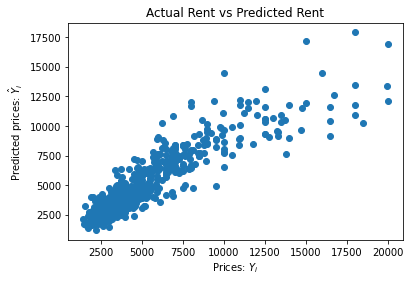

In [59]:
#Create a 2D scatter plot using y_test and y_predict.
plt.scatter(y_test, y_predict)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Actual Rent vs Predicted Rent")
plt.show()

In [60]:
#Print out the coefficients using .coef_
print(mlr.coef_)


[-302.73009383 1199.3859951     4.79976742  -24.28993151   24.19824177
   -7.58272473 -140.90664773   48.85017415  191.4257324  -151.11453388
   89.408889    -57.89714551  -19.31948556  -38.92369828]


To see if there are any features that don’t affect price linearly, let’s graph the different features against rent.

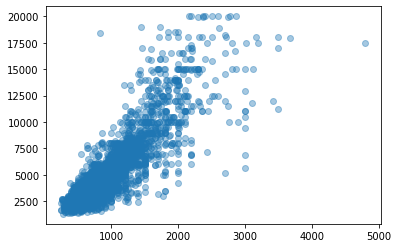

In [61]:
#Create a scatterplot of size_sqft and rent:
plt.scatter(df[['size_sqft']], df[['rent']], alpha=0.4)
plt.show()

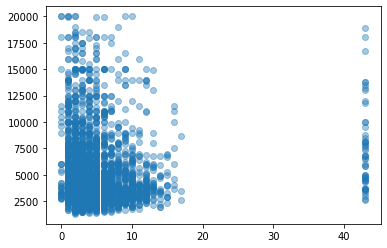

In [62]:
#Create a scatterplot of min_to_subway and rent
plt.scatter(df[['min_to_subway']], df[['rent']], alpha=0.4)
plt.show()

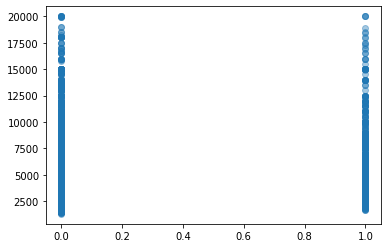

In [63]:
plt.scatter(df[['has_doorman']], df[['rent']], alpha=0.4)
plt.show()

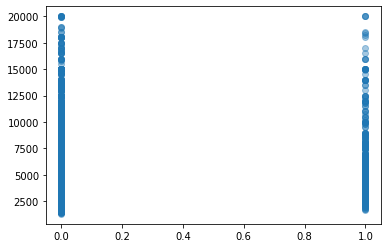

In [64]:
plt.scatter(df[['has_roofdeck']], df[['rent']], alpha=0.4)
plt.show()

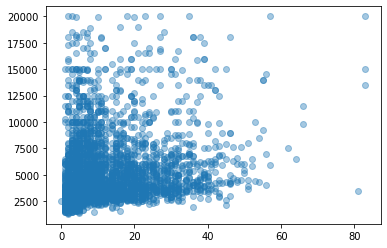

In [65]:
plt.scatter(df[['floor']], df[['rent']], alpha=0.4)
plt.show()

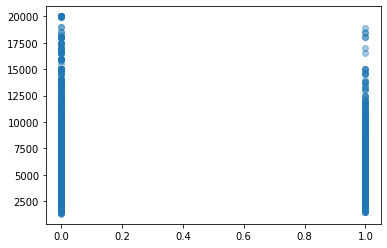

In [66]:
plt.scatter(df[['no_fee']], df[['rent']], alpha=0.4)
plt.show()

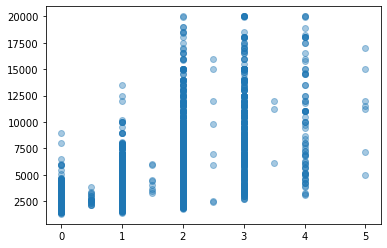

In [67]:
plt.scatter(df[['bedrooms']], df[['rent']], alpha=0.4)
plt.show()

#Evaluating the Model's Accuracy

When trying to evaluate the accuracy of our multiple linear regression model, one technique we can use is Residual Analysis.
The best possible R² is 1.00 (and it can be negative because the model can be arbitrarily worse). Usually, a R² of 0.70 is considered good.

Use the .score() method from LinearRegression to find the mean squared error regression loss for the training set.

In [68]:
print("Train score:")
print(mlr.score(x_train, y_train))

Train score:
0.7725460559817883


 find the mean squared error regression loss for the testing set.

In [69]:
print("Test score:")
print(mlr.score(x_test, y_test))

Test score:
0.8050371975357646


#Rebuild the Model
Now let’s rebuild the model using the new features as well as evaluate the new model to see if we improved!

Remove some of the features that don’t have strong correlations and see if your scores improved!

Train score:
0.7724491324928461
Test score:
0.8050642726248811


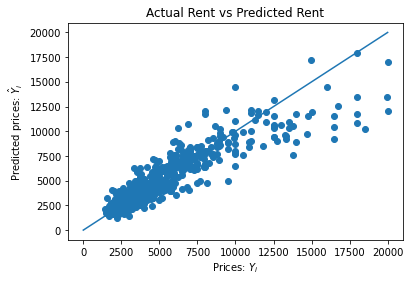

[[-302.77130543 1197.06620119    4.80382945  -24.29138033   24.18627001
    -7.60897092 -143.48921489  203.38019912 -102.91407807  -41.24510714
   -15.56609933    8.40238628]]


In [72]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df = pd.read_csv("https://raw.githubusercontent.com/sonnynomnom/Codecademy-Machine-Learning-Fundamentals/master/StreetEasy/manhattan.csv")

x = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_washer_dryer', 'has_doorman', 'has_dishwasher', 'has_patio', 'has_gym']]
y = df[['rent']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)

lm = LinearRegression()

model = lm.fit(x_train, y_train)

y_predict= lm.predict(x_test)

print("Train score:")
print(lm.score(x_train, y_train))

print("Test score:")
print(lm.score(x_test, y_test))

plt.scatter(y_test, y_predict)
plt.plot(range(20000), range(20000))

plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Actual Rent vs Predicted Rent")

plt.show()

print(lm.coef_)

https://s3.us-east-2.amazonaws.com/codecademy-content-sites/streeteasy/rent.html